In [ ]:
pip install pmdarima

In [175]:
import pandas as pd
import numpy as np

In [196]:
df = pd.read_csv("dane_out_2016_2020.csv", index_col='data',parse_dates=True)
df=df.dropna()
print('Rozmiar danych',df.shape)
print(df.head())
print(df.tail())

Rozmiar danych (43000, 18)
            godzina  temperatura_powietrza  ...  NOx_Bujaka  NOx_Bulwarowa
data                                        ...                           
2016-01-01  0:00:00              -8.871667  ...   92.960271      63.097419
2016-01-01  1:00:00              -9.153333  ...  289.800000     135.551000
2016-01-01  2:00:00              -9.475000  ...  291.100000     137.275000
2016-01-01  3:00:00              -9.851667  ...  192.400000     118.484000
2016-01-01  4:00:00             -10.175000  ...  301.900000     101.397000

[5 rows x 18 columns]
             godzina  temperatura_powietrza  ...  NOx_Bujaka  NOx_Bulwarowa
data                                         ...                           
2020-12-31  19:00:00               2.685000  ...         0.0      63.097419
2020-12-31  20:00:00               2.223333  ...         0.0      63.097419
2020-12-31  21:00:00               2.208333  ...         0.0      63.097419
2020-12-31  22:00:00              10.416666  

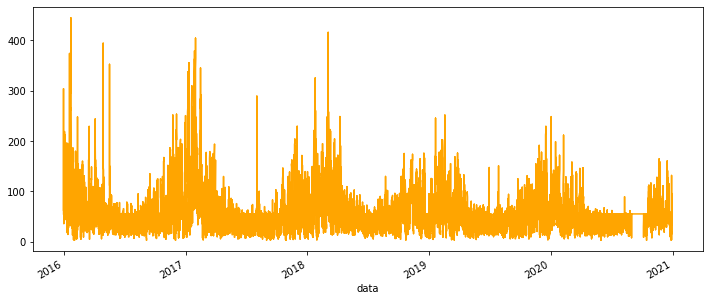

In [197]:
df['PM10_Al_Krasińskiego'].plot(figsize=(12,5), color="orange")

In [198]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
ad_test(df['PM10_Al_Krasińskiego'])

1. ADF :  -14.914375291462912
2. P-Value :  1.442535245534364e-27
3. Num Of Lags :  50
4. Num Of Observations Used For ADF Regression: 42949
5. Critical Values :
	 1% :  -3.4305022664294555
	 5% :  -2.8616072983912026
	 10% :  -2.5668058207502655


In [199]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [200]:
stepwise_fit = auto_arima(df['PM10_Al_Krasińskiego'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=346360.882, Time=20.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=348209.602, Time=1.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=347965.942, Time=4.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=347940.195, Time=6.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=348207.602, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=25.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=346343.379, Time=33.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=346360.354, Time=23.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=347872.868, Time=9.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=346345.228, Time=37.81 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=347808.193, Time=12.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=346347.321, Time=57.92 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=346341.411, Time=10.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=346358.377, Time=6.03 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                43000
Model:               SARIMAX(2, 1, 1)   Log Likelihood             -173166.706
Date:                Wed, 05 Jan 2022   AIC                         346341.411
Time:                        15:32:47   BIC                         346376.087
Sample:                             0   HQIC                        346352.350
                              - 43000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8703      0.002    497.366      0.000       0.867       0.874
ar.L2          0.0231      0.002     11.422      0.000       0.019       0.027
ma.L1         -0.9861      0.001  -1323.860      0.000      -0.988      -0.985
sigma2       184.2976      0.368    501.385      0.000     183.577     185.018
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            884154.13
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
#print(train)

(43000, 18)
(42970, 18) (30, 18)


In [202]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

In [239]:
model=ARIMA(df['PM10_Al_Krasińskiego'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     PM10_Al_Krasińskiego   No. Observations:                43000
Model:                   ARIMA(2, 1, 1)   Log Likelihood             -173166.706
Date:                  Wed, 05 Jan 2022   AIC                         346341.411
Time:                          15:44:12   BIC                         346376.087
Sample:                               0   HQIC                        346352.350
                                - 43000                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8703      0.002    497.366      0.000       0.867       0.874
ar.L2          0.0231      0.002     11.422      0.000       0.019       0.027
ma.L1         -0.9861      0.001  -1323.860      0.000      -0.988      -0.985
sigma2       184.2976      0.368    501.385      0.000     183.577     185.018
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            884154.13
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [240]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#print(pred)
pred.index=df.index[start:end+1]
print(pred.head())

data
2020-12-30    55.554040
2020-12-30    57.374704
2020-12-30    66.794345
2020-12-30    72.103802
2020-12-30    67.933763
Name: ARIMA Predictions, dtype: float64


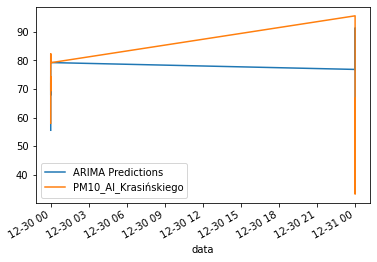

In [245]:
pred.plot(legend=True)
test['PM10_Al_Krasińskiego'].plot(legend=True)

In [242]:
test['PM10_Al_Krasińskiego'].mean()

59.565181785657366

In [243]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['PM10_Al_Krasińskiego'].mean()
rmse=sqrt(mean_squared_error(pred,test['PM10_Al_Krasińskiego']))
print(rmse)

8.464741881427383
